# Improt Libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib
import warnings
warnings.filterwarnings("ignore")

# Define Function

In [23]:
def encode_units(x):
    if x in ( 'ไม่เคย', 'ไม่เคยซื้อ', 'ไม่เคยซือ', 'ไม่'):
        return 0
    if x in ('เคยซื้อ','เคย'):
        return 1

# Import Data

In [24]:
df = pd.read_csv('response.csv')
df = df.drop(columns=['Timestamp'])
df = df.fillna('ไม่เคยซื้อ')
df.head()

,playstation5,เครื่องทำขนมปัง,Ergonomic Wrist Rest,เครื่องอบผ้า,เครื่องชงกาแฟแคปซูล,เก้าอี้ LA-Z-Boy,เครื่องให้อาหารสัตว์อัตโนมัติ,บัตตาเลี่ยน,แก้วเก็บความเย็น,ลู่วิ่งออกกำลังกาย,Kindle,เครื่องซักผ้า,Bluetooth Speaker,ห้องน้ำแมวอัตโนมัติ,PS5,ทรายแมว,ลำโพง pixel,Logitech Mx Master 3 Mouse,ตุ๊กตา ty,น้ำพุแมว,Robot ดูดฝุ่น,Mechanical keyboard,Nintendo switch,หนังสือ python,gaming chair,Deskmat,Dew - ไฟโรเซ่,เทียนหอม jo malone,กระติกน้ำ 2 ลิตร,ที่นอน memory form,พลาสเตอร์บรรเทาปวด ตราเสือ,การ์ดจอ RTX 3080,ขนมจีนน้ำยาปู,Salmon Sashimi,จักรยานเสือหมอบ,ไฟแต่งห้องมินิมอล,External Harddisk,หม้อทอดไร้น้ํามัน,airpods,ยาดม,ไฟส่องหน้าไลฟ์สด
0,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
1,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
2,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,เคย,ไม่เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
3,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,เคย,ไม่เคย,เคย,เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ
4,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคย,เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ


# Cleaning Data

In [25]:
df_trans = df.applymap(encode_units)
df_trans['play_station5'] = np.where((df_trans.playstation5==1)|(df_trans.PS5==1) ,1,0)
df_trans = df_trans.drop(columns=['playstation5','PS5'])
df_trans.head()

,เครื่องทำขนมปัง,Ergonomic Wrist Rest,เครื่องอบผ้า,เครื่องชงกาแฟแคปซูล,เก้าอี้ LA-Z-Boy,เครื่องให้อาหารสัตว์อัตโนมัติ,บัตตาเลี่ยน,แก้วเก็บความเย็น,ลู่วิ่งออกกำลังกาย,Kindle,เครื่องซักผ้า,Bluetooth Speaker,ห้องน้ำแมวอัตโนมัติ,ทรายแมว,ลำโพง pixel,Logitech Mx Master 3 Mouse,ตุ๊กตา ty,น้ำพุแมว,Robot ดูดฝุ่น,Mechanical keyboard,Nintendo switch,หนังสือ python,gaming chair,Deskmat,Dew - ไฟโรเซ่,เทียนหอม jo malone,กระติกน้ำ 2 ลิตร,ที่นอน memory form,พลาสเตอร์บรรเทาปวด ตราเสือ,การ์ดจอ RTX 3080,ขนมจีนน้ำยาปู,Salmon Sashimi,จักรยานเสือหมอบ,ไฟแต่งห้องมินิมอล,External Harddisk,หม้อทอดไร้น้ํามัน,airpods,ยาดม,ไฟส่องหน้าไลฟ์สด,play_station5
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0
3,0,0,1,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,1,1,1,1,0,1,1,0,1,1,1,1,1,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0


In [26]:
frequent_itemsets = apriori(df_trans, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bluetooth Speaker),(แก้วเก็บความเย็น),0.723404,0.702128,0.510638,0.705882,1.005348,0.002716,1.012766
1,(แก้วเก็บความเย็น),(Bluetooth Speaker),0.702128,0.723404,0.510638,0.727273,1.005348,0.002716,1.014184
2,(แก้วเก็บความเย็น),(External Harddisk),0.702128,0.787234,0.574468,0.818182,1.039312,0.021729,1.170213
3,(External Harddisk),(แก้วเก็บความเย็น),0.787234,0.702128,0.574468,0.729730,1.039312,0.021729,1.102128
4,(ยาดม),(แก้วเก็บความเย็น),0.808511,0.702128,0.595745,0.736842,1.049442,0.028067,1.131915
5,(แก้วเก็บความเย็น),(ยาดม),0.702128,0.808511,0.595745,0.848485,1.049442,0.028067,1.263830
6,(Bluetooth Speaker),(Salmon Sashimi),0.723404,0.829787,0.617021,0.852941,1.027903,0.016750,1.157447
7,(Salmon Sashimi),(Bluetooth Speaker),0.829787,0.723404,0.617021,0.743590,1.027903,0.016750,1.078723
8,(Bluetooth Speaker),(External Harddisk),0.723404,0.787234,0.595745,0.823529,1.046105,0.026256,1.205674
9,(External Harddisk),(Bluetooth Speaker),0.787234,0.723404,0.595745,0.756757,1.046105,0.026256,1.137116


In [27]:
rules[(rules['lift'] >= 1) &
       (rules['confidence'] >= 0.5)].sort_values(by=['lift'] ,ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
53,(พลาสเตอร์บรรเทาปวด ตราเสือ),"(ยาดม, Salmon Sashimi)",0.553191,0.723404,0.510638,0.923077,1.276018,0.110457,3.595745
52,"(ยาดม, Salmon Sashimi)",(พลาสเตอร์บรรเทาปวด ตราเสือ),0.723404,0.553191,0.510638,0.705882,1.276018,0.110457,1.519149
54,(ยาดม),"(พลาสเตอร์บรรเทาปวด ตราเสือ, Salmon Sashimi)",0.808511,0.510638,0.510638,0.631579,1.236842,0.097782,1.328267
51,"(พลาสเตอร์บรรเทาปวด ตราเสือ, Salmon Sashimi)",(ยาดม),0.510638,0.808511,0.510638,1.000000,1.236842,0.097782,inf
14,(พลาสเตอร์บรรเทาปวด ตราเสือ),(ยาดม),0.553191,0.808511,0.531915,0.961538,1.189271,0.084654,4.978723
15,(ยาดม),(พลาสเตอร์บรรเทาปวด ตราเสือ),0.808511,0.553191,0.531915,0.657895,1.189271,0.084654,1.306056
45,"(ยาดม, External Harddisk)",(Bluetooth Speaker),0.659574,0.723404,0.553191,0.838710,1.159393,0.076053,1.714894
48,(Bluetooth Speaker),"(ยาดม, External Harddisk)",0.723404,0.659574,0.553191,0.764706,1.159393,0.076053,1.446809
50,"(พลาสเตอร์บรรเทาปวด ตราเสือ, ยาดม)",(Salmon Sashimi),0.531915,0.829787,0.510638,0.960000,1.156923,0.069262,4.255319
55,(Salmon Sashimi),"(พลาสเตอร์บรรเทาปวด ตราเสือ, ยาดม)",0.829787,0.531915,0.510638,0.615385,1.156923,0.069262,1.217021


# Graphical Analysis

In [28]:
!wget -q http://www.arts.chula.ac.th/ling/wp-content/uploads/TH-Sarabun_Chula1.1.zip -O font.zip
!unzip -qj font.zip TH-Sarabun_Chula1.1/THSarabunChula-Regular.ttf
!pip install -U --pre matplotlib  
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('THSarabunChula-Regular.ttf')
mpl.rc('font', family='TH Sarabun Chula')

replace THSarabunChula-Regular.ttf? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes


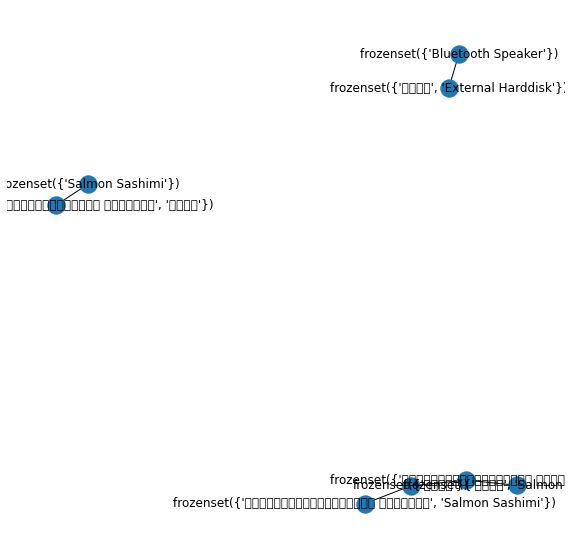

In [29]:
fig, ax=plt.subplots(figsize=(10,10))
GA_rule = rules[(rules['lift'] >= 1) &
       (rules['confidence'] >= 0.5)].sort_values(by=['lift'] ,ascending=False).head(10)
GA=nx.from_pandas_edgelist(GA_rule,source='antecedents' ,target='consequents')
nx.draw(GA,with_labels=True,font_family='TH Sarabun Chula')

plt.show()

# Summary
#1)ถ้าเกิด customer ทำการซื้อ Salmon Sashimi กับ ยาดม เราควรแนะนำให้ customer ซื้อ พลาสเตอร์บรรเทาปวด ตราเสือ เนื่องจากมีค่า lift และ support ที่สูง
#2)ถ้าเกิด customer ซื้อแค่ ยาดม เราควร แนะนำให้ customer ซื้อ พลาสเตอร์บรรเทาปวด ตราเสือ เนื่องจากมีค่า lift และ support ที่สูง